In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

pd.options.display.float_format = '{:.2f}'.format

In [28]:
frame_comp = pd.read_csv("train.csv")
frame_origin = pd.read_csv("Insurance Premium Prediction Dataset.csv")

frame_comp = 대회 데이터

frame_origin = 원본 데이터

대회 데이터는 원본 데이터를 이용해서 생성된 데이터이다. 그래서 두 데이터를 병합하기 전에 두 데이터를 병합해도 문제 없는지 판단 후 병합 예정이다.

종속 변수 : Premium Amount

In [29]:
frame_comp.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.00,Female,10049.00,Married,1.00,Bachelor's,Self-Employed,22.60,Urban,...,2.00,17.00,372.00,5.00,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.00
1,1,39.00,Female,31678.00,Divorced,3.00,Master's,NaN,15.57,Rural,...,1.00,12.00,694.00,2.00,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.00
2,2,23.00,Male,25602.00,Divorced,3.00,High School,Self-Employed,47.18,Suburban,...,1.00,14.00,NaN,3.00,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.00
3,3,21.00,Male,141855.00,Married,2.00,Bachelor's,NaN,10.94,Rural,...,1.00,0.00,367.00,1.00,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.00
4,4,21.00,Male,39651.00,Single,1.00,Bachelor's,Self-Employed,20.38,Rural,...,0.00,8.00,598.00,4.00,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.00


In [30]:
frame_origin.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,56.00,Male,99990.00,Married,1.00,Master's,NaN,31.07,Urban,Comprehensive,NaN,13,320.00,5,308.00,2022-12-10 15:21:39.078837,Poor,Yes,Daily,Condo
1,46.00,Male,2867.00,Single,1.00,Bachelor's,NaN,50.27,Urban,Comprehensive,NaN,3,694.00,4,517.00,2023-01-31 15:21:39.078837,Good,Yes,Monthly,House
2,32.00,Female,30154.00,Divorced,3.00,Bachelor's,NaN,14.71,Suburban,Comprehensive,2.00,16,652.00,8,849.00,2023-11-26 15:21:39.078837,Poor,No,Monthly,House
3,60.00,Female,48371.00,Divorced,0.00,PhD,Self-Employed,25.35,Rural,Comprehensive,1.00,11,330.00,7,927.00,2023-02-27 15:21:39.078837,Poor,No,Rarely,Condo
4,25.00,Female,54174.00,Divorced,0.00,High School,Self-Employed,6.66,Urban,Comprehensive,NaN,9,NaN,8,303.00,2020-11-25 15:21:39.078837,Poor,No,Rarely,Condo


두 데이터 프레임의 알파벳 순서로 내림차순 정렬

In [31]:
frame_comp = frame_comp[sorted(frame_comp.columns)]
frame_origin = frame_origin[sorted(frame_origin.columns)]

열 이름 동일한지 확인

In [32]:
print(set(frame_comp.columns) == set(frame_origin.columns))

False


In [33]:
print(set(frame_origin.columns) - set(frame_comp.columns))
print(set(frame_comp.columns) - set(frame_origin.columns))

set()
{'id'}


frame_comp에는 id열이 존재하나 frame_origin에는 id 열이 존재하지 않는다.

id 열을 제외한 다른 열의 이름은 모두 동일하다.

id 열 제거

id 열을 제거 판단 근거
1. 병합할 때 id 열이 없는 부분은 결측치가 된다.
2. 회원 id가 보험료를 회귀 예측 하는데 유의미하지 않을 것이라 판단했다.

In [34]:
frame_comp.drop(columns="id", inplace=True)
print(set(frame_comp.columns) == set(frame_origin.columns))

True


결측치 존재 확인

In [35]:
frame_comp.isnull().sum()

Age                      18705
Annual Income            44949
Credit Score            137882
Customer Feedback        77824
Education Level              0
Exercise Frequency           0
Gender                       0
Health Score             74076
Insurance Duration           1
Location                     0
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Policy Start Date            0
Policy Type                  0
Premium Amount               0
Previous Claims         364029
Property Type                0
Smoking Status               0
Vehicle Age                  6
dtype: int64

In [36]:
frame_origin.isnull().sum()

Age                      4685
Annual Income           13955
Credit Score            27886
Customer Feedback       18349
Education Level             0
Exercise Frequency          0
Gender                      0
Health Score            10597
Insurance Duration          0
Location                    0
Marital Status           5019
Number of Dependents    27886
Occupation              81288
Policy Start Date           0
Policy Type                 0
Premium Amount           1841
Previous Claims         81288
Property Type               0
Smoking Status              0
Vehicle Age                 0
dtype: int64

두 데이터 프레임 모두 여러 열에서 결측치가 존재한다.

두 데이터 프레임의 데이터 타입이 모두 동일한지 확인

In [37]:
print(frame_comp[frame_comp.columns].dtypes == frame_origin[frame_origin.columns].dtypes)

Age                      True
Annual Income            True
Credit Score             True
Customer Feedback        True
Education Level          True
Exercise Frequency       True
Gender                   True
Health Score             True
Insurance Duration      False
Location                 True
Marital Status           True
Number of Dependents     True
Occupation               True
Policy Start Date        True
Policy Type              True
Premium Amount           True
Previous Claims          True
Property Type            True
Smoking Status           True
Vehicle Age             False
dtype: bool


In [38]:
print("Insurance Duration")
print("frame_comp['Insurance Duration'] : " + str(frame_comp["Insurance Duration"].dtypes))
print("frame_origin['Insurance Duration'] : " + str(frame_origin["Insurance Duration"].dtypes) + "\n")

print("Vehicle Age")
print("frame_comp['Vehicle Age'] : " + str(frame_comp["Vehicle Age"].dtypes))
print("frame_origin['Vehicle Age'] : " + str(frame_origin["Vehicle Age"].dtypes))

Insurance Duration
frame_comp['Insurance Duration'] : float64
frame_origin['Insurance Duration'] : int64

Vehicle Age
frame_comp['Vehicle Age'] : float64
frame_origin['Vehicle Age'] : int64


Vehicle Age와 Insurance Duration의 데이터 타입이 다르다. 두 열의 데이터 타입을 살펴보니 두 열 모두 int64와 float64의 차이였다.

Vehicle Age와 Insurance Duration 두 열 모두 년수를 의미하는 열이다. 그래서 두 열의 의미를 고려했을 때 데이터 타입의 차이는 유의미하지 않다고 판단했다. 그래서 결측치, 데이터 범위, 정규화를 고려해서 데이터 타입 변환은 float64가 적합하다고 판단했다.

데이터 타입 변환

In [39]:
frame_comp['Insurance Duration'] = frame_comp['Insurance Duration'].astype('float64')
frame_origin['Insurance Duration'] = frame_origin['Insurance Duration'].astype('float64')

frame_comp['Vehicle Age'] = frame_comp['Vehicle Age'].astype('float64')
frame_origin['Vehicle Age'] = frame_origin['Vehicle Age'].astype('float64')

print("Insurance Duration")
print("frame_comp['Insurance Duration'] : " + str(frame_comp["Insurance Duration"].dtypes))
print("frame_origin['Insurance Duration'] : " + str(frame_origin["Insurance Duration"].dtypes) + "\n")

print("Vehicle Age")
print("frame_comp['Vehicle Age'] : " + str(frame_comp["Vehicle Age"].dtypes))
print("frame_origin['Vehicle Age'] : " + str(frame_origin["Vehicle Age"].dtypes))
print(frame_comp[frame_comp.columns].dtypes == frame_origin[frame_origin.columns].dtypes)

Insurance Duration
frame_comp['Insurance Duration'] : float64
frame_origin['Insurance Duration'] : float64

Vehicle Age
frame_comp['Vehicle Age'] : float64
frame_origin['Vehicle Age'] : float64
Age                     True
Annual Income           True
Credit Score            True
Customer Feedback       True
Education Level         True
Exercise Frequency      True
Gender                  True
Health Score            True
Insurance Duration      True
Location                True
Marital Status          True
Number of Dependents    True
Occupation              True
Policy Start Date       True
Policy Type             True
Premium Amount          True
Previous Claims         True
Property Type           True
Smoking Status          True
Vehicle Age             True
dtype: bool


Vehicle Age와 Insurance Duration 두 열 모두 데이터 타입 float64로 변환했다.

통계값 차이 확인

In [40]:
diff = frame_origin.describe() - frame_comp.describe()
diff

,Age,Annual Income,Credit Score,Health Score,Insurance Duration,Number of Dependents,Premium Amount,Previous Claims,Vehicle Age
count,-907120.00,-890146.00,-811144.00,-857661.00,-921139.00,-839354.00,-922981.00,-638399.00,-921134.00
mean,-0.12,9343.87,-18.56,2.97,-0.01,-0.01,-136.43,-0.00,-0.05
std,0.01,3265.01,8.81,3.76,-0.01,-0.01,44.41,0.02,-0.01
min,0.00,-1.00,0.00,-1.98,0.00,0.00,-20.00,0.00,0.00
25%,-1.00,5587.00,-31.00,0.23,0.00,0.00,-228.00,0.00,0.00
50%,0.00,8280.00,-20.00,1.87,0.00,0.00,-184.00,0.00,0.00
75%,0.00,17530.00,-9.00,4.44,0.00,0.00,-142.00,0.00,0.00
max,0.00,0.00,0.00,34.90,0.00,0.00,0.00,0.00,0.00


두 데이터 프레임의 통계값의 차이가 유의미하지 않다고 판단했다.

중복값 확인

In [41]:
common_rows = pd.merge(frame_comp, frame_origin)
common_rows

,Age,Annual Income,Credit Score,Customer Feedback,Education Level,Exercise Frequency,Gender,Health Score,Insurance Duration,Location,Marital Status,Number of Dependents,Occupation,Policy Start Date,Policy Type,Premium Amount,Previous Claims,Property Type,Smoking Status,Vehicle Age


중복값은 존재하지 않는다.

데이터 시각화 - frame_comp - float64

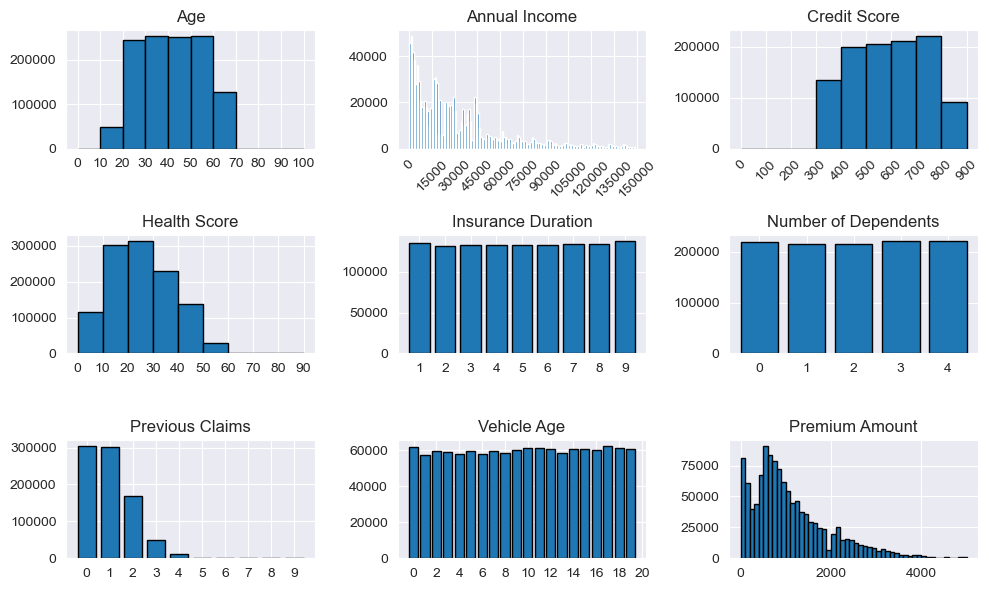

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(10, 6))

axes[0][0].hist(frame_comp["Age"], bins=np.arange(0, 110, 10), edgecolor='black')
axes[0][0].set_xticks(np.arange(0, 110, 10))
axes[0][0].set_title('Age')

axes[0][1].hist(frame_comp["Annual Income"], bins=np.arange(frame_comp["Annual Income"].min(), frame_comp["Annual Income"].max(), 1000.0))
axes[0][1].set_xticks(np.linspace(0.0, 150000.0, 11))
axes[0][1].set_title('Annual Income')
axes[0][1].tick_params(axis="x", rotation=45)

axes[0][2].hist(frame_comp["Credit Score"], bins=np.arange(0.0, 1000.0, 100.0), edgecolor='black')
axes[0][2].set_xticks(np.arange(0.0, 1000.0, 100.0))
axes[0][2].set_title('Credit Score')
axes[0][2].tick_params(axis="x", rotation=45)


axes[1][0].hist(frame_comp["Health Score"], bins=np.arange(0.0, 100.0, 10.0), edgecolor='black')
axes[1][0].set_xticks(np.arange(0.0, 100.0, 10.0))
axes[1][0].set_title('Health Score')

axes[1][1].bar(frame_comp["Insurance Duration"].value_counts().index, frame_comp["Insurance Duration"].value_counts().values, edgecolor='black')
axes[1][1].set_xticks(frame_comp["Insurance Duration"].value_counts().index)
axes[1][1].set_title('Insurance Duration')

axes[1][2].bar(frame_comp["Number of Dependents"].value_counts().index, frame_comp["Number of Dependents"].value_counts().values, edgecolor='black')
axes[1][2].set_xticks(frame_comp["Number of Dependents"].value_counts().index)
axes[1][2].set_title('Number of Dependents')


axes[2][0].bar(frame_comp["Previous Claims"].value_counts().index, frame_comp["Previous Claims"].value_counts().values, edgecolor='black')
axes[2][0].set_xticks(frame_comp["Previous Claims"].value_counts().index)
axes[2][0].set_title('Previous Claims')

axes[2][1].bar(frame_comp["Vehicle Age"].value_counts().index, frame_comp["Vehicle Age"].value_counts().values, edgecolor='black')
axes[2][1].set_xticks(np.linspace(0, 20, 11))
axes[2][1].set_title('Vehicle Age')

axes[2][2].hist(frame_comp["Premium Amount"], bins=np.arange(0, 5001, 100), edgecolor='black')
axes[2][2].set_title('Premium Amount')


plt.tight_layout()

plt.show()


정규분포를 따르는지 확인 - Kolmogorov-Smirnov Test

In [43]:
for column in ('Age', 'Annual Income', 'Credit Score', 'Health Score', 'Premium Amount'):
    column_null = frame_comp[column].dropna()
    stat, p = sp.stats.kstest(column_null, 'norm')
    print(f"{column} : Statistic={stat}, p-value={p}")
    
    if p > 0.05:
        print("정규분포를 따릅니다.\n")
    else:
        print("정규분포를 따르지 않습니다.\n")

Age : Statistic=1.0, p-value=0.0
정규분포를 따르지 않습니다.

Annual Income : Statistic=0.9999893241967802, p-value=0.0
정규분포를 따르지 않습니다.

Credit Score : Statistic=1.0, p-value=0.0
정규분포를 따르지 않습니다.

Health Score : Statistic=0.9983737874350319, p-value=0.0
정규분포를 따르지 않습니다.

Premium Amount : Statistic=1.0, p-value=0.0
정규분포를 따르지 않습니다.



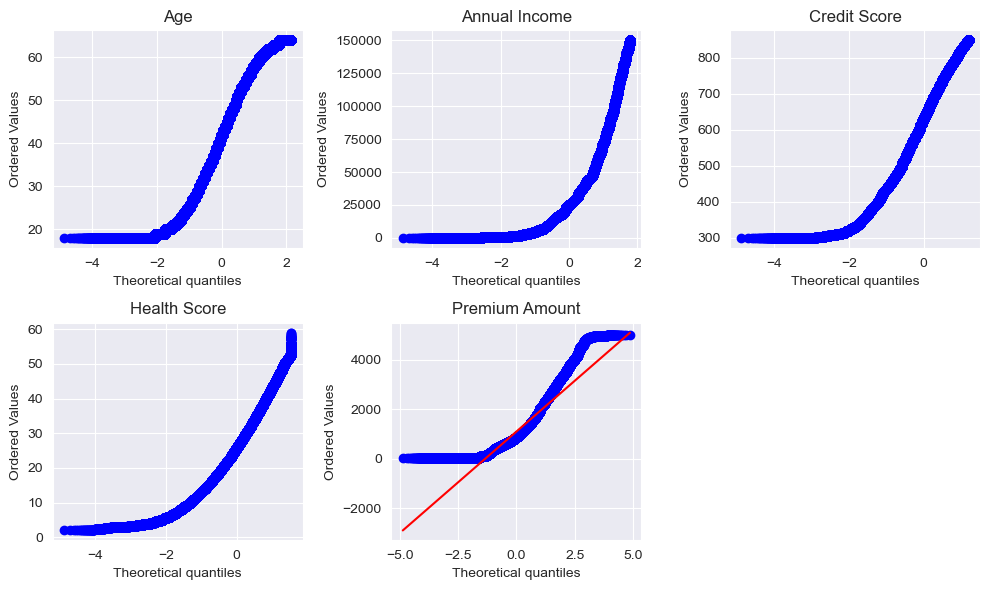

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
column_stat = (('Age', 'Annual Income', 'Credit Score'), ('Health Score', 'Premium Amount'))

for i in range(len(column_stat)):
    for j in range(len(column_stat[i])):
        col = column_stat[i][j]
        sp.stats.probplot(frame_comp[col], dist="norm", plot=axes[i][j])
        axes[i][j].set_title(col)

axes[1][2].set_visible(False)

plt.tight_layout()
plt.show()

데이터 시각화 - 범주형 - 명목형

명목형 : Gender, Location, Marital Status, Occupation, Property Type, Smoking Status

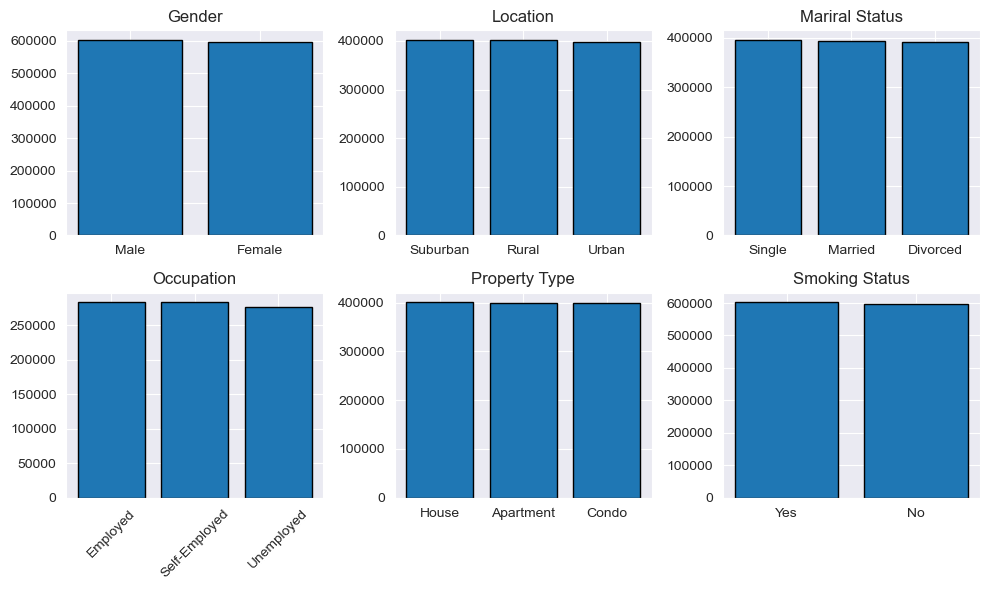

In [45]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

axes[0][0].bar(frame_comp["Gender"].value_counts().index, frame_comp["Gender"].value_counts().values, edgecolor='black')
axes[0][0].set_title('Gender')

axes[0][1].bar(frame_comp["Location"].value_counts().index, frame_comp["Location"].value_counts().values, edgecolor='black')
axes[0][1].set_title('Location')

axes[0][2].bar(frame_comp["Marital Status"].value_counts().index, frame_comp["Marital Status"].value_counts().values, edgecolor='black')
axes[0][2].set_title('Mariral Status')


axes[1][0].bar(frame_comp["Occupation"].value_counts().index, frame_comp["Occupation"].value_counts().values, edgecolor='black')
axes[1][0].set_title('Occupation')
axes[1][0].tick_params(axis="x", rotation=45)

axes[1][1].bar(frame_comp["Property Type"].value_counts().index, frame_comp["Property Type"].value_counts().values, edgecolor='black')
axes[1][1].set_title('Property Type')

axes[1][2].bar(frame_comp["Smoking Status"].value_counts().index, frame_comp["Smoking Status"].value_counts().values, edgecolor='black')
axes[1][2].set_title('Smoking Status')


plt.tight_layout()

plt.show()


데이터 시각화 - 범주형 - 순서형

순서형 : Customer Feedback, Education Level, Exercise Frequency, Policy Type

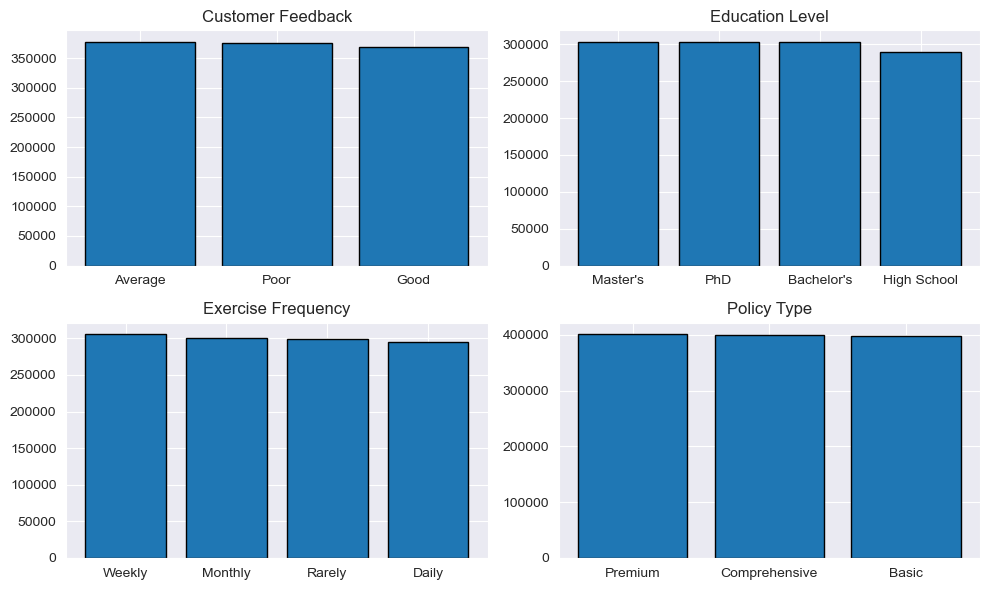

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0][0].bar(frame_comp["Customer Feedback"].value_counts().index, frame_comp["Customer Feedback"].value_counts().values, edgecolor='black')
axes[0][0].set_title('Customer Feedback')

axes[0][1].bar(frame_comp["Education Level"].value_counts().index, frame_comp["Education Level"].value_counts().values, edgecolor='black')
axes[0][1].set_title('Education Level')


axes[1][0].bar(frame_comp["Exercise Frequency"].value_counts().index, frame_comp["Exercise Frequency"].value_counts().values, edgecolor='black')
axes[1][0].set_title('Exercise Frequency')

axes[1][1].bar(frame_comp["Policy Type"].value_counts().index, frame_comp["Policy Type"].value_counts().values, edgecolor='black')
axes[1][1].set_title('Policy Type')


plt.tight_layout()

plt.show()


데이터 시각화 - frame_origin - float64

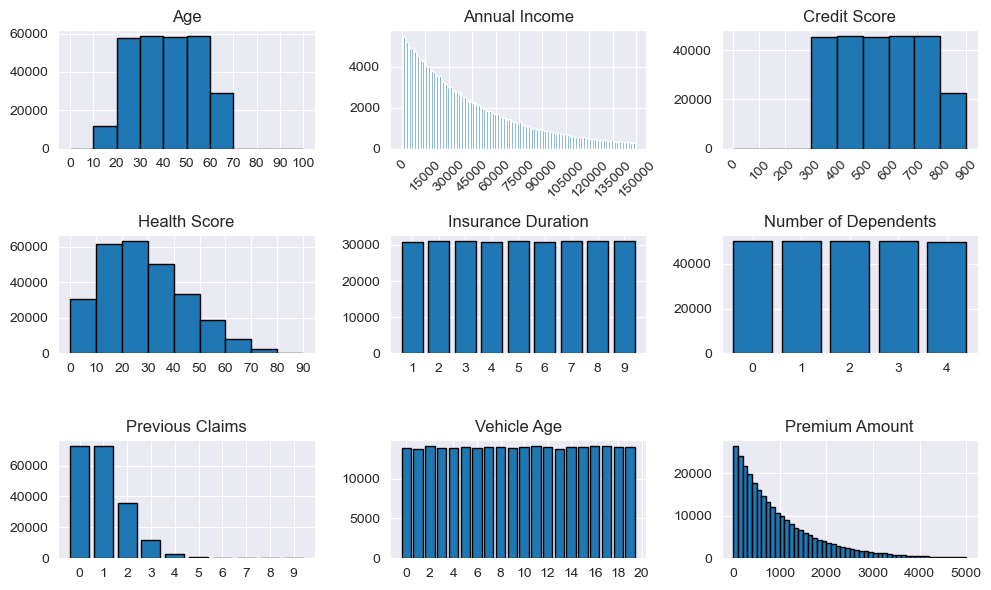

In [47]:
fig, axes = plt.subplots(3, 3, figsize=(10, 6))

axes[0][0].hist(frame_origin["Age"], bins=np.arange(0, 110, 10), edgecolor='black')
axes[0][0].set_xticks(np.arange(0, 110, 10))
axes[0][0].set_title('Age')



axes[0][1].hist(frame_origin["Annual Income"], bins=np.arange(frame_origin["Annual Income"].min(), frame_origin["Annual Income"].max(), 1000.0))
axes[0][1].set_xticks(np.linspace(0.0, 150000.0, 11))
axes[0][1].set_title('Annual Income')
axes[0][1].tick_params(axis="x", rotation=45)

axes[0][2].hist(frame_origin["Credit Score"], bins=np.arange(0.0, 1000.0, 100.0), edgecolor='black')
axes[0][2].set_xticks(np.arange(0.0, 1000.0, 100.0))
axes[0][2].set_title('Credit Score')
axes[0][2].tick_params(axis="x", rotation=45)


axes[1][0].hist(frame_origin["Health Score"], bins=np.arange(0.0, 100.0, 10.0), edgecolor='black')
axes[1][0].set_xticks(np.arange(0.0, 100.0, 10.0))
axes[1][0].set_title('Health Score')

axes[1][1].bar(frame_origin["Insurance Duration"].value_counts().index, frame_origin["Insurance Duration"].value_counts().values, edgecolor='black')
axes[1][1].set_xticks(frame_origin["Insurance Duration"].value_counts().index)
axes[1][1].set_title('Insurance Duration')

axes[1][2].bar(frame_origin["Number of Dependents"].value_counts().index, frame_origin["Number of Dependents"].value_counts().values, edgecolor='black')
axes[1][2].set_xticks(frame_origin["Number of Dependents"].value_counts().index)
axes[1][2].set_title('Number of Dependents')


axes[2][0].bar(frame_origin["Previous Claims"].value_counts().index, frame_origin["Previous Claims"].value_counts().values, edgecolor='black')
axes[2][0].set_xticks(frame_origin["Previous Claims"].value_counts().index)
axes[2][0].set_title('Previous Claims')

axes[2][1].bar(frame_origin["Vehicle Age"].value_counts().index, frame_origin["Vehicle Age"].value_counts().values, edgecolor='black')
axes[2][1].set_xticks(np.linspace(0, 20, 11))
axes[2][1].set_title('Vehicle Age')

axes[2][2].hist(frame_origin["Premium Amount"], bins=np.arange(0, 5001, 100), edgecolor='black')
axes[2][2].set_title('Premium Amount')


plt.tight_layout()

plt.show()

정규성 확인 - Kolmogorov-Smirnov Test

In [48]:
for column in ('Age', 'Annual Income', 'Credit Score', 'Health Score', 'Premium Amount'):
    column_null = frame_origin[column].dropna()
    stat, p = sp.stats.kstest(column_null, 'norm')
    print(f"{column} : Statistic={stat}, p-value={p}")
    
    if p > 0.05:
        print("정규분포를 따릅니다.\n")
    else:
        print("정규분포를 따르지 않습니다.\n")

Age : Statistic=1.0, p-value=0.0
정규분포를 따르지 않습니다.

Annual Income : Statistic=0.9999091148319788, p-value=0.0
정규분포를 따르지 않습니다.

Credit Score : Statistic=1.0, p-value=0.0
정규분포를 따르지 않습니다.

Health Score : Statistic=0.9863874890026919, p-value=0.0
정규분포를 따르지 않습니다.

Premium Amount : Statistic=0.9959577735254933, p-value=0.0
정규분포를 따르지 않습니다.



정규성 확인 - Q-Q Plot

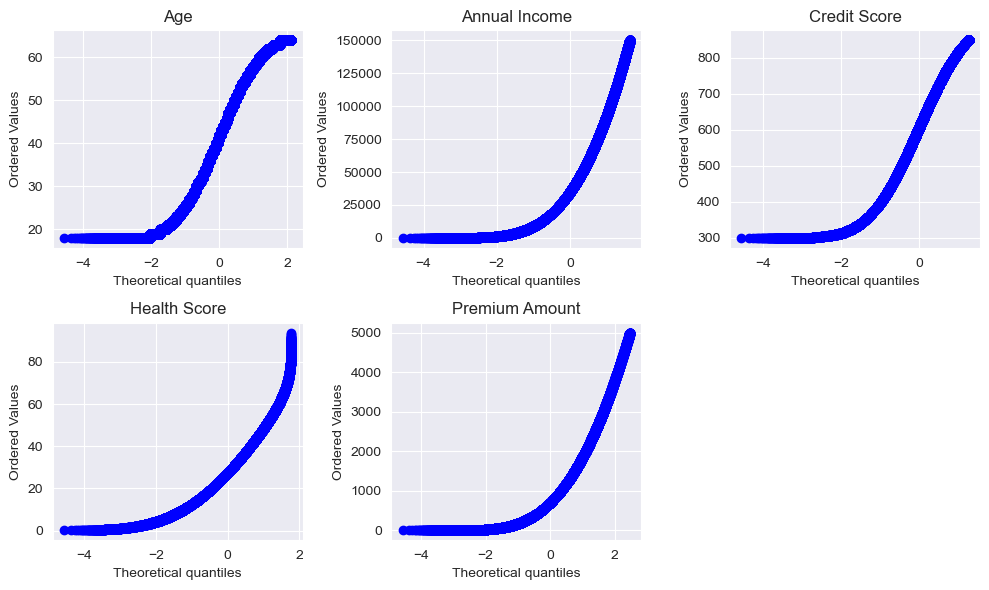

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
column_stat = (('Age', 'Annual Income', 'Credit Score'), ('Health Score', 'Premium Amount'))

for i in range(len(column_stat)):
    for j in range(len(column_stat[i])):
        col = column_stat[i][j]
        sp.stats.probplot(frame_origin[col], dist="norm", plot=axes[i][j])
        axes[i][j].set_title(col)

axes[1][2].set_visible(False)

plt.tight_layout()
plt.show()

데이터 시각화 - 범주형 - 명목형

명목형 : Gender, Location, Marital Status, Occupation, Property Type, Smoking Status

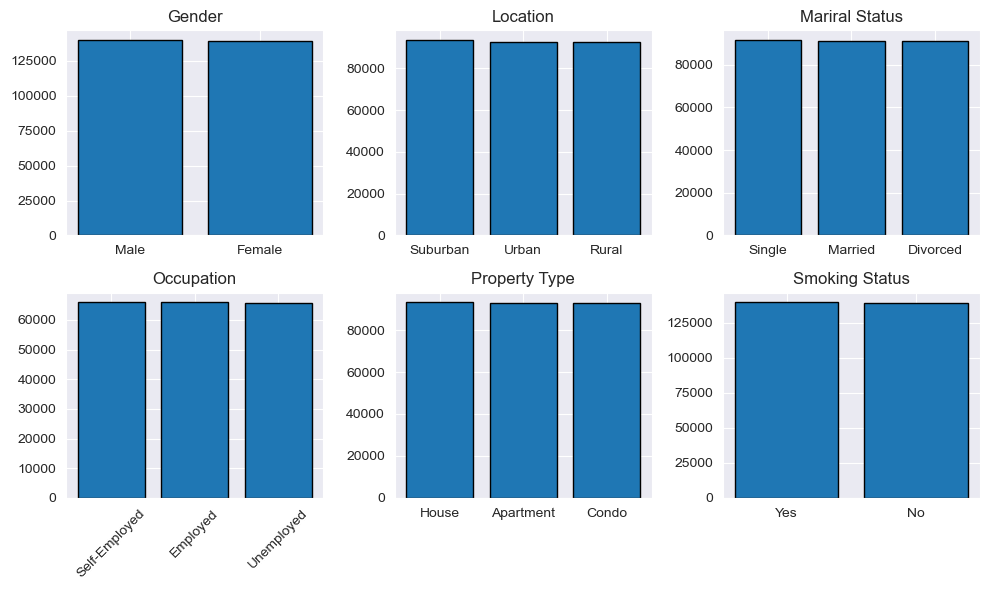

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

axes[0][0].bar(frame_origin["Gender"].value_counts().index, frame_origin["Gender"].value_counts().values, edgecolor='black')
axes[0][0].set_title('Gender')

axes[0][1].bar(frame_origin["Location"].value_counts().index, frame_origin["Location"].value_counts().values, edgecolor='black')
axes[0][1].set_title('Location')

axes[0][2].bar(frame_origin["Marital Status"].value_counts().index, frame_origin["Marital Status"].value_counts().values, edgecolor='black')
axes[0][2].set_title('Mariral Status')


axes[1][0].bar(frame_origin["Occupation"].value_counts().index, frame_origin["Occupation"].value_counts().values, edgecolor='black')
axes[1][0].set_title('Occupation')
axes[1][0].tick_params(axis="x", rotation=45)

axes[1][1].bar(frame_origin["Property Type"].value_counts().index, frame_origin["Property Type"].value_counts().values, edgecolor='black')
axes[1][1].set_title('Property Type')

axes[1][2].bar(frame_origin["Smoking Status"].value_counts().index, frame_origin["Smoking Status"].value_counts().values, edgecolor='black')
axes[1][2].set_title('Smoking Status')


plt.tight_layout()

plt.show()


데이터 시각화 - 범주형 - 순서형

순서형 : Customer Feedback, Education Level, Exercise Frequency, Policy Type

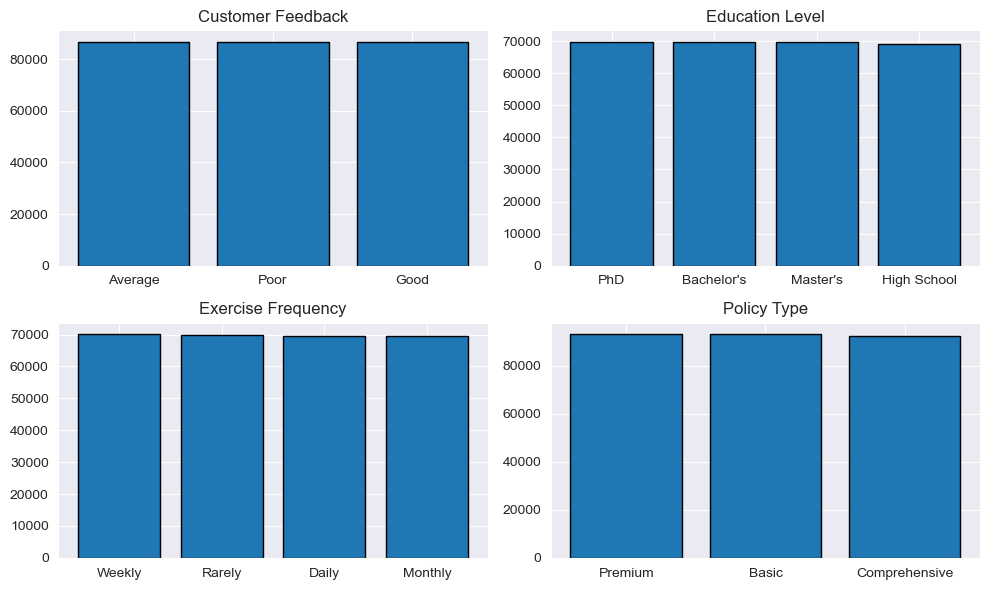

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0][0].bar(frame_origin["Customer Feedback"].value_counts().index, frame_origin["Customer Feedback"].value_counts().values, edgecolor='black')
axes[0][0].set_title('Customer Feedback')

axes[0][1].bar(frame_origin["Education Level"].value_counts().index, frame_origin["Education Level"].value_counts().values, edgecolor='black')
axes[0][1].set_title('Education Level')


axes[1][0].bar(frame_origin["Exercise Frequency"].value_counts().index, frame_origin["Exercise Frequency"].value_counts().values, edgecolor='black')
axes[1][0].set_title('Exercise Frequency')

axes[1][1].bar(frame_origin["Policy Type"].value_counts().index, frame_origin["Policy Type"].value_counts().values, edgecolor='black')
axes[1][1].set_title('Policy Type')


plt.tight_layout()

plt.show()


시각화된 데이터를 살펴봤을 때 두 데이터(frame_origin, frame_comp)의 형태, 값의 빈도수, 분포에서 유의미한 차이는 없다고 판단했다. 주목할 점은 독립 변수 Annual Income과 종속 변수 Premium Amounts의 그래프 형태가 유사하다. 즉, 두 변수의 선형 관계가 강할 것으로 예상된다.

두 데이터 프레임을 병합하는데 문제 없다고 판단한 근거
1. 모든 열의 수, 열의 이름, 열의 의미 모두 동일하다.
2. 모든 열의 통계값이 유사하고 단위도 동일하다.
3. 중복값이 존재하지 않는다.
3. 데이터 타입 차이가 존재하나 해당 열의 통계값 차이, 열의 의미를 생각했을 때 데이터 타입의 차이가 유의미하지 않다.
4. 시각화된 데이터를 살펴봤을 때 데이터의 형태, 값의 빈도수에서 유의미한 차이는 없다.

데이터 프레임 병합

In [52]:
common_columns = frame_comp.columns.intersection(frame_origin.columns)

frame = pd.concat([frame_comp, frame_origin], ignore_index=True)

병합된 데이트 프레임 확인

병합된 데이터 프레임 열의 수, 열의 이름 동일 여부

In [53]:
print('frame_comp 열 수 :' + str(len(frame_comp.columns)))
print('frame_origin 열 수 :' + str(len(frame_origin.columns)))
print('frame 열 수 : ' + str(len(frame.columns)))

print('\n열 이름 동일 여부\n' + str(set(frame.columns) == set(frame_origin.columns) and set(frame.columns) == set(frame_comp.columns)))

frame_comp 열 수 :20
frame_origin 열 수 :20
frame 열 수 : 20

열 이름 동일 여부
True


병합된 데이터 프레임의 열의 수, 열의 이름과 병합에 사용한 두 데이터 프레임의 열의 수, 열의 이름이 동일하다.

병합된 데이터 프레임 행의 수 확인

In [54]:
print(frame.info())
print('\n행 수 동일 여부 : ' + str((len(frame_origin) + len(frame_comp)) == len(frame)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478860 entries, 0 to 1478859
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1455470 non-null  float64
 1   Annual Income         1419956 non-null  float64
 2   Credit Score          1313092 non-null  float64
 3   Customer Feedback     1382687 non-null  object 
 4   Education Level       1478860 non-null  object 
 5   Exercise Frequency    1478860 non-null  object 
 6   Gender                1478860 non-null  object 
 7   Health Score          1394187 non-null  float64
 8   Insurance Duration    1478859 non-null  float64
 9   Location              1478860 non-null  object 
 10  Marital Status        1455312 non-null  object 
 11  Number of Dependents  1341302 non-null  float64
 12  Occupation            1039497 non-null  object 
 13  Policy Start Date     1478860 non-null  object 
 14  Policy Type           1478860 non-

병합된 데이터 프레임의 행의 수와 병합에 사용한 두 데이터 프레임의 행의 수를 더한 값과 동일하다.

병합된 데이터 프레임과 병합에 사용된 2 개의 데이터 프레임과의 통계값 차이 비교

In [55]:
frame.describe() - frame_comp.describe()

,Age,Annual Income,Credit Score,Health Score,Insurance Duration,Number of Dependents,Premium Amount,Previous Claims,Vehicle Age
count,274175.00,264905.00,250974.00,268263.00,278860.00,250974.00,277019.00,197572.00,278860.00
mean,-0.02,1743.18,-3.55,0.57,-0.00,-0.00,-25.59,-0.00,-0.01
std,0.00,835.04,1.90,0.86,-0.00,-0.00,10.12,0.00,-0.00
min,0.00,-1.00,0.00,-1.98,0.00,0.00,-20.00,0.00,0.00
25%,-1.00,1067.00,-5.00,0.02,0.00,0.00,-46.00,0.00,0.00
50%,0.00,1085.00,-4.00,0.27,0.00,0.00,-35.00,0.00,0.00
75%,0.00,1679.00,-2.00,0.72,0.00,0.00,-25.00,0.00,0.00
max,0.00,0.00,0.00,34.90,0.00,0.00,0.00,0.00,0.00


In [56]:
frame.describe() - frame_origin.describe()

,Age,Annual Income,Credit Score,Health Score,Insurance Duration,Number of Dependents,Premium Amount,Previous Claims,Vehicle Age
count,1181295.00,1155051.00,1062118.00,1125924.00,1199999.00,1090328.00,1200000.00,835971.00,1199994.00
mean,0.10,-7600.69,15.01,-2.40,0.01,0.01,110.84,0.00,0.04
std,-0.01,-2429.98,-6.91,-2.90,0.01,0.00,-34.28,-0.01,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,-4520.00,26.00,-0.21,0.00,0.00,182.00,0.00,0.00
50%,0.00,-7195.00,16.00,-1.60,0.00,0.00,149.00,0.00,0.00
75%,0.00,-15851.00,7.00,-3.72,0.00,0.00,117.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [57]:
(frame.describe() * 2) - (frame_comp.describe() + frame_origin.describe())

,Age,Annual Income,Credit Score,Health Score,Insurance Duration,Number of Dependents,Premium Amount,Previous Claims,Vehicle Age
count,1455470.00,1419956.00,1313092.00,1394187.00,1478859.00,1341302.00,1477019.00,1033543.00,1478854.00
mean,0.08,-5857.51,11.47,-1.83,0.01,0.01,85.25,0.00,0.03
std,-0.01,-1594.94,-5.01,-2.04,0.01,0.00,-24.16,-0.01,0.01
min,0.00,-1.00,0.00,-1.98,0.00,0.00,-20.00,0.00,0.00
25%,-1.00,-3453.00,21.00,-0.19,0.00,0.00,136.00,0.00,0.00
50%,0.00,-6110.00,12.00,-1.33,0.00,0.00,114.00,0.00,0.00
75%,0.00,-14172.00,5.00,-3.01,0.00,0.00,92.00,0.00,0.00
max,0.00,0.00,0.00,34.90,0.00,0.00,0.00,0.00,0.00


병합된 데이터 프레임과 병합할 때 사용한 두 데이터 프레임과 통계값을 비교했을 때 통계값 차이가 유의미하지 않다.

데이터 타입 설정

In [58]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478860 entries, 0 to 1478859
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1455470 non-null  float64
 1   Annual Income         1419956 non-null  float64
 2   Credit Score          1313092 non-null  float64
 3   Customer Feedback     1382687 non-null  object 
 4   Education Level       1478860 non-null  object 
 5   Exercise Frequency    1478860 non-null  object 
 6   Gender                1478860 non-null  object 
 7   Health Score          1394187 non-null  float64
 8   Insurance Duration    1478859 non-null  float64
 9   Location              1478860 non-null  object 
 10  Marital Status        1455312 non-null  object 
 11  Number of Dependents  1341302 non-null  float64
 12  Occupation            1039497 non-null  object 
 13  Policy Start Date     1478860 non-null  object 
 14  Policy Type           1478860 non-

float64 열의 소수 부분이 0인지 아닌지 확인

In [59]:
check_frame = frame.dropna()

for column in check_frame.columns:
    if frame[column].dtype == 'float64':
        print(column)
        print((np.modf(check_frame[column])[0] == 0).all())
        print('\n')

Age
True


Annual Income
True


Credit Score
True


Health Score
False


Insurance Duration
True


Number of Dependents
True


Premium Amount
True


Previous Claims
True


Vehicle Age
True




확인 결과 Health Score 열을 제외하고 다른 열은 모두 소수 자리가 0이다. 그래서 Health Score는 float64를 그대로 유지하는 것이 적합하다고 판단했다. Health Score을 제외한 나머지 열에 대해서 열의 의미, 값의 범위, 연속형 데이터, 이산형 데이터를 생각했을 때 Int32가 적합하다고 생각된다. 하지만 모델링 단계에서 정규화를 고려하고 이전의 고려 사항들을 모두 고려했을 때 모두 float64로 변환하는 것이 가장 적합하다고 판단했다.

숫자형 데이터를 모두 float64로 변환

In [60]:
for column in frame.columns:
    if frame[column].dtype in ('float64', 'float32', 'Int64', 'Int32', 'int64', 'int32'):
        frame[column] = frame[column].astype('float64')

frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478860 entries, 0 to 1478859
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1455470 non-null  float64
 1   Annual Income         1419956 non-null  float64
 2   Credit Score          1313092 non-null  float64
 3   Customer Feedback     1382687 non-null  object 
 4   Education Level       1478860 non-null  object 
 5   Exercise Frequency    1478860 non-null  object 
 6   Gender                1478860 non-null  object 
 7   Health Score          1394187 non-null  float64
 8   Insurance Duration    1478859 non-null  float64
 9   Location              1478860 non-null  object 
 10  Marital Status        1455312 non-null  object 
 11  Number of Dependents  1341302 non-null  float64
 12  Occupation            1039497 non-null  object 
 13  Policy Start Date     1478860 non-null  object 
 14  Policy Type           1478860 non-

object 변수 분류 및 변환

object 변수 분류

In [61]:
for column in frame.columns:
    if frame[column].dtype == 'object':
        print(column)
        print(frame[column].dtypes == 'object')
        print('\n')

Customer Feedback
True


Education Level
True


Exercise Frequency
True


Gender
True


Location
True


Marital Status
True


Occupation
True


Policy Start Date
True


Policy Type
True


Property Type
True


Smoking Status
True




In [62]:
for column in frame.columns:
    if frame[column].dtype == 'object':
        print(column)
        print(frame[column].unique())
        print('\n')


Customer Feedback
['Poor' 'Average' 'Good' nan]


Education Level
["Bachelor's" "Master's" 'High School' 'PhD']


Exercise Frequency
['Weekly' 'Monthly' 'Daily' 'Rarely']


Gender
['Female' 'Male']


Location
['Urban' 'Rural' 'Suburban']


Marital Status
['Married' 'Divorced' 'Single' nan]


Occupation
['Self-Employed' nan 'Employed' 'Unemployed']


Policy Start Date
['2023-12-23 15:21:39.134960' '2023-06-12 15:21:39.111551'
 '2023-09-30 15:21:39.221386' ... '2020-10-26 15:21:39.291118'
 '2022-11-13 15:21:39.291118' '2024-01-14 15:21:39.291118']


Policy Type
['Premium' 'Comprehensive' 'Basic']


Property Type
['House' 'Apartment' 'Condo']


Smoking Status
['No' 'Yes']




열의 의미, 열의 값을 고려했을 때 다음과 같이 범주형 변수를 분류하고 그 세부 분류를 했다.

명목형 변수

Gender, Location, Maritial Status, Occupation, Property Type, Smoking Status

명목형 변수로 분류된 모든 열의 범주가 적어서 모두 모델링 단계에서 One-Hot Encoding이 적합하다고 판단했고 데이터 분석 단계에서는 CategoricalDtype(ordered=False) 함수가 적합하다고 판단했다.

순서형 변수

Customer Feedback, Education Level, Exercise Frequency, Policy Type

순서형 변수는 모델링 단계에서는 Ordinal Encoding을 사용하고 데이터 분석 단계에서는 CategoricalDtype(ordered=True) 함수를 사용하는 것이 적합하다고 판단했다.

예외
Policy Start Date(날짜형)

Policy Start Date는 날짜 데이터이므로 데이터 분석 단계에서는 datetime64으로 변환하여 분석 후 모델링 단계에서 오늘 날을 기준으로 경과일을 기준으로 float64으로 변환하는 것이 적합하다고 판단했다.

명목형 변수 변환

명목형 변수 - ordered == False

Gender, Location, Marital Status, Occupation, Property Type, Smoking Status



In [63]:
columns = ['Gender', 'Location', 'Marital Status', 'Occupation', 'Property Type', 'Smoking Status']

for column in columns:
    frame[column] = frame[column].astype("category")

for column in columns:
    print(f"Column : {column}")
    print("Categories : ", frame[column].cat.categories)
    print("Ordered : ", frame[column].cat.ordered, "\n")

Column : Gender
Categories :  Index(['Female', 'Male'], dtype='object')
Ordered :  False 

Column : Location
Categories :  Index(['Rural', 'Suburban', 'Urban'], dtype='object')
Ordered :  False 

Column : Marital Status
Categories :  Index(['Divorced', 'Married', 'Single'], dtype='object')
Ordered :  False 

Column : Occupation
Categories :  Index(['Employed', 'Self-Employed', 'Unemployed'], dtype='object')
Ordered :  False 

Column : Property Type
Categories :  Index(['Apartment', 'Condo', 'House'], dtype='object')
Ordered :  False 

Column : Smoking Status
Categories :  Index(['No', 'Yes'], dtype='object')
Ordered :  False 



순서형 변수 변환

순서형 변수 - ordered == True

Customer Feedback, Education Level, Exercise Frequency, Policy Type


In [64]:
columns = ['Customer Feedback', 'Education Level', 'Exercise Frequency', 'Policy Type']
unique = [['Poor', 'Average', 'Good'], ['High School', "Bachelor's", "Master's", 'PhD'], ['Daily', 'Weekly', 'Monthly', 'Rarely'], ['Basic', 'Comprehensive', 'Premium']]

for column in columns:
    frame[column] = frame[column].astype("category")

columns = ['Customer Feedback', 'Education Level', 'Exercise Frequency', 'Policy Type']

for set_cat, column in zip(unique, columns):
    frame[column] = frame[column].cat.set_categories(set_cat, ordered=True)

for column in columns:
    print(f"Column : {column}")
    print("Categories : ", frame[column].cat.categories)
    print("Ordered : ", frame[column].cat.ordered, "\n")


Column : Customer Feedback
Categories :  Index(['Poor', 'Average', 'Good'], dtype='object')
Ordered :  True 

Column : Education Level
Categories :  Index(['High School', 'Bachelor's', 'Master's', 'PhD'], dtype='object')
Ordered :  True 

Column : Exercise Frequency
Categories :  Index(['Daily', 'Weekly', 'Monthly', 'Rarely'], dtype='object')
Ordered :  True 

Column : Policy Type
Categories :  Index(['Basic', 'Comprehensive', 'Premium'], dtype='object')
Ordered :  True 



날짜형 데이터 타입 변환

날짜형 변수 - datetime64[ns]

Policy Start Date

In [65]:
frame['Policy Start Date'] = frame['Policy Start Date'].astype("datetime64[ns]")
print(frame['Policy Start Date'].dtypes)

datetime64[ns]


모든 열의 데이터 타입 확인

In [66]:
print(frame.dtypes)

Age                            float64
Annual Income                  float64
Credit Score                   float64
Customer Feedback             category
Education Level               category
Exercise Frequency            category
Gender                        category
Health Score                   float64
Insurance Duration             float64
Location                      category
Marital Status                category
Number of Dependents           float64
Occupation                    category
Policy Start Date       datetime64[ns]
Policy Type                   category
Premium Amount                 float64
Previous Claims                float64
Property Type                 category
Smoking Status                category
Vehicle Age                    float64
dtype: object


모든 열을 분석을 위해 의도한 타입으로 변환 완료

데이터 시각화

데이터 시각화 - float64


Age, Annual Income, Credit Score, Health Score, Insurance Duration, Number of Dependents, Previous Claims, Vehicle Age, Premium Amount

In [67]:
frame.describe()

,Age,Annual Income,Credit Score,Health Score,Insurance Duration,Number of Dependents,Policy Start Date,Premium Amount,Previous Claims,Vehicle Age
count,1455470.00,1419956.00,1313092.00,1394187.00,1478859.00,1341302.00,1478860,1477019.00,1033543.00,1478854.00
mean,41.12,34488.40,589.38,26.19,5.02,2.01,2022-02-13 17:14:31.268761600,1076.96,1.00,9.56
min,18.00,0.00,300.00,0.04,1.00,0.00,2019-08-17 15:21:39.080371,0.00,0.00,0.00
25%,29.00,9068.00,463.00,15.94,3.00,1.00,2020-11-19 15:21:39.211805952,468.00,0.00,5.00
50%,41.00,24996.00,591.00,24.85,5.00,2.00,2022-02-14 15:21:39.225915904,837.00,1.00,10.00
75%,53.00,46313.00,719.00,35.24,7.00,3.00,2023-05-08 15:21:39.155230976,1484.00,2.00,15.00
max,64.00,149997.00,849.00,93.88,9.00,4.00,2024-08-15 15:21:39.287115,4999.00,9.00,19.00
std,13.54,33014.54,151.88,13.06,2.59,1.42,NaN,875.12,0.99,5.77


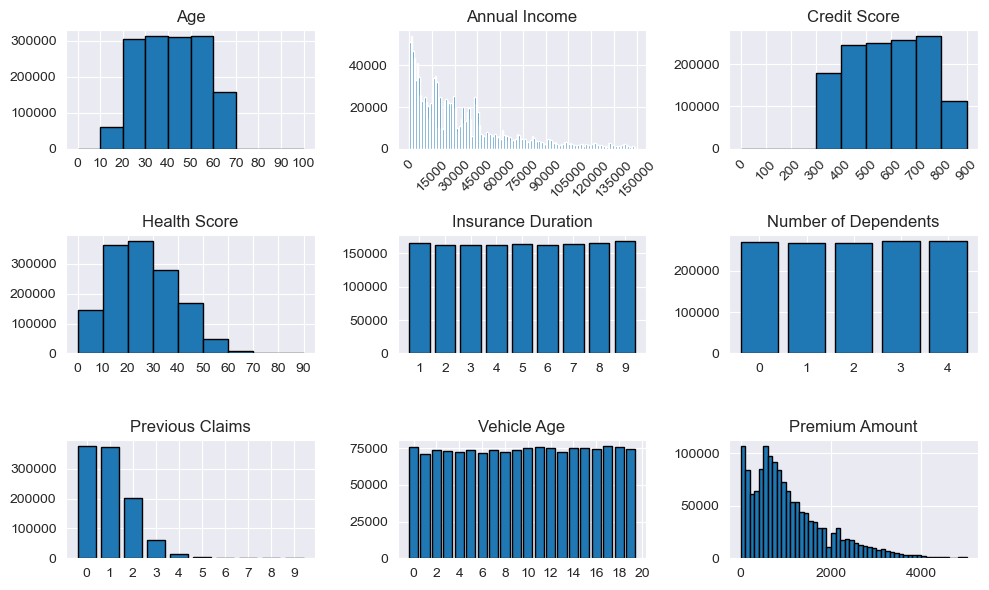

In [68]:
fig, axes = plt.subplots(3, 3, figsize=(10, 6))

axes[0][0].hist(frame["Age"], bins=np.arange(0, 110, 10), edgecolor='black')
axes[0][0].set_xticks(np.arange(0, 110, 10))
axes[0][0].set_title('Age')

axes[0][1].hist(frame["Annual Income"], bins=np.arange(frame["Annual Income"].min(), frame["Annual Income"].max(), 1000.0))
axes[0][1].set_xticks(np.linspace(0.0, 150000.0, 11))
axes[0][1].set_title('Annual Income')
axes[0][1].tick_params(axis="x", rotation=45)

axes[0][2].hist(frame["Credit Score"], bins=np.arange(0.0, 1000.0, 100.0), edgecolor='black')
axes[0][2].set_xticks(np.arange(0.0, 1000.0, 100.0))
axes[0][2].set_title('Credit Score')
axes[0][2].tick_params(axis="x", rotation=45)


axes[1][0].hist(frame["Health Score"], bins=np.arange(0.0, 100.0, 10.0), edgecolor='black')
axes[1][0].set_xticks(np.arange(0.0, 100.0, 10.0))
axes[1][0].set_title('Health Score')

axes[1][1].bar(frame["Insurance Duration"].value_counts().index, frame["Insurance Duration"].value_counts().values, edgecolor='black')
axes[1][1].set_xticks(frame["Insurance Duration"].value_counts().index)
axes[1][1].set_title('Insurance Duration')

axes[1][2].bar(frame["Number of Dependents"].value_counts().index, frame["Number of Dependents"].value_counts().values, edgecolor='black')
axes[1][2].set_xticks(frame["Number of Dependents"].value_counts().index)
axes[1][2].set_title('Number of Dependents')


axes[2][0].bar(frame["Previous Claims"].value_counts().index, frame["Previous Claims"].value_counts().values, edgecolor='black')
axes[2][0].set_xticks(frame["Previous Claims"].value_counts().index)
axes[2][0].set_title('Previous Claims')

axes[2][1].bar(frame["Vehicle Age"].value_counts().index, frame["Vehicle Age"].value_counts().values, edgecolor='black')
axes[2][1].set_xticks(np.linspace(0, 20, 11))
axes[2][1].set_title('Vehicle Age')

axes[2][2].hist(frame["Premium Amount"], bins=np.arange(0, 5001, 100), edgecolor='black')
axes[2][2].set_title('Premium Amount')


plt.tight_layout()

plt.show()

데이터의 분포를 확인했을 때 크게 문제가 없는 것으로 보인다.

정규성 확인 - Kolmogorov-Smirnov Test

In [69]:
for column in ('Age', 'Annual Income', 'Credit Score', 'Health Score', 'Premium Amount'):
    column_null = frame[column].dropna()
    stat, p = sp.stats.kstest(column_null, 'norm')
    print(f"{column} : Statistic={stat}, p-value={p}")
    
    if p > 0.05:
        print("정규분포를 따릅니다.\n")
    else:
        print("정규분포를 따르지 않습니다.\n")

Age : Statistic=1.0, p-value=0.0
정규분포를 따르지 않습니다.

Annual Income : Statistic=0.9999743604501693, p-value=0.0
정규분포를 따르지 않습니다.

Credit Score : Statistic=1.0, p-value=0.0
정규분포를 따르지 않습니다.

Health Score : Statistic=0.9959856777466691, p-value=0.0
정규분포를 따르지 않습니다.

Premium Amount : Statistic=0.9992161380280544, p-value=0.0
정규분포를 따르지 않습니다.



정규성 확인 - Q-Q Plot

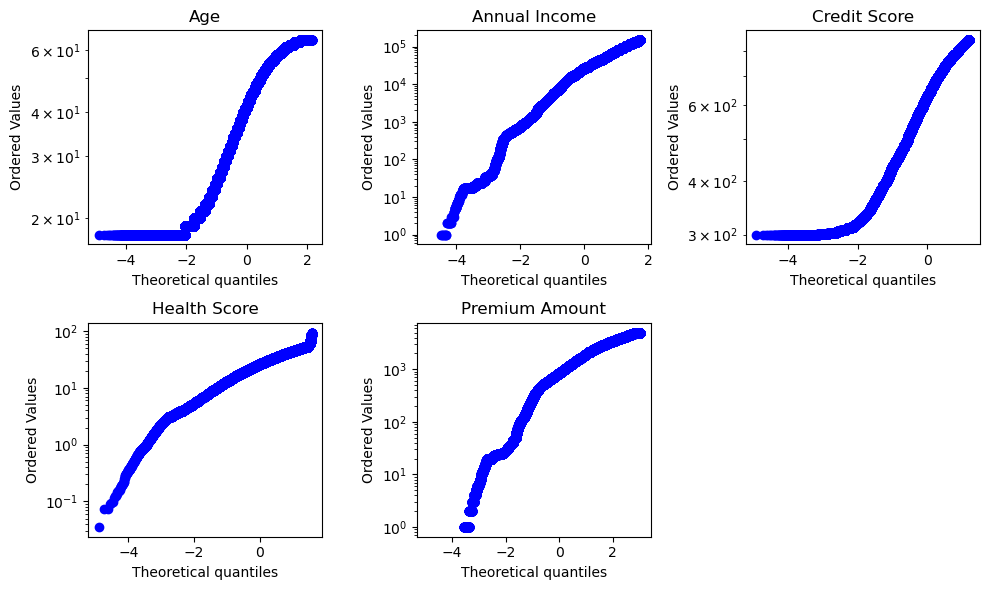

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
column_stat = (('Age', 'Annual Income', 'Credit Score'), ('Health Score', 'Premium Amount'))

for i in range(len(column_stat)):
    for j in range(len(column_stat[i])):
        col = column_stat[i][j]
        axes[i][j].set_yscale("log")
        sp.stats.probplot(frame[col], dist="norm", plot=axes[i][j])
        axes[i][j].set_title(col)

axes[1][2].set_visible(False)

plt.tight_layout()
plt.show()

Kolmogorov-Smirnov Test, Q-Q Plot에 의하면 'Age', 'Annual Income', 'Credit Score', 'Health Score', 'Premium Amount' 모두 정규분포를 따르지 않는다. 그 이유는 양의 왜도 분포에 가깝기 때문이다.

데이터 시각화 - 범주형 - 명목형

명목형 : Gender, Location, Marital Status, Occupation, Property Type, Smoking Status

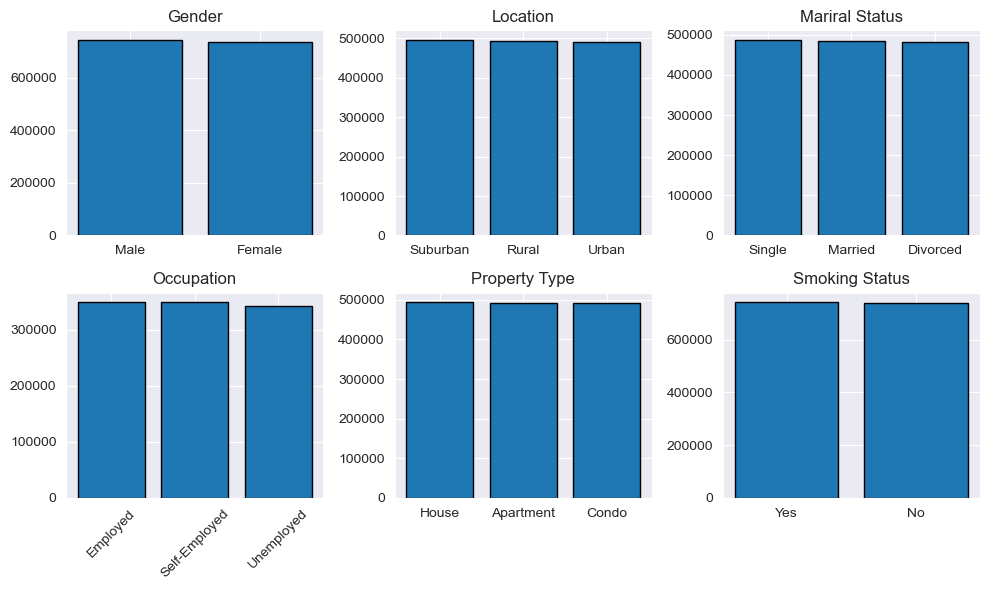

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

axes[0][0].bar(frame["Gender"].value_counts().index, frame["Gender"].value_counts().values, edgecolor='black')
axes[0][0].set_title('Gender')

axes[0][1].bar(frame["Location"].value_counts().index, frame["Location"].value_counts().values, edgecolor='black')
axes[0][1].set_title('Location')

axes[0][2].bar(frame["Marital Status"].value_counts().index, frame["Marital Status"].value_counts().values, edgecolor='black')
axes[0][2].set_title('Mariral Status')


axes[1][0].bar(frame["Occupation"].value_counts().index, frame["Occupation"].value_counts().values, edgecolor='black')
axes[1][0].set_title('Occupation')
axes[1][0].tick_params(axis="x", rotation=45)

axes[1][1].bar(frame["Property Type"].value_counts().index, frame["Property Type"].value_counts().values, edgecolor='black')
axes[1][1].set_title('Property Type')

axes[1][2].bar(frame["Smoking Status"].value_counts().index, frame["Smoking Status"].value_counts().values, edgecolor='black')
axes[1][2].set_title('Smoking Status')


plt.tight_layout()

plt.show()


데이터 시각화 - 범주형 - 순서형

순서형 : Customer Feedback, Education Level, Exercise Frequency, Policy Type

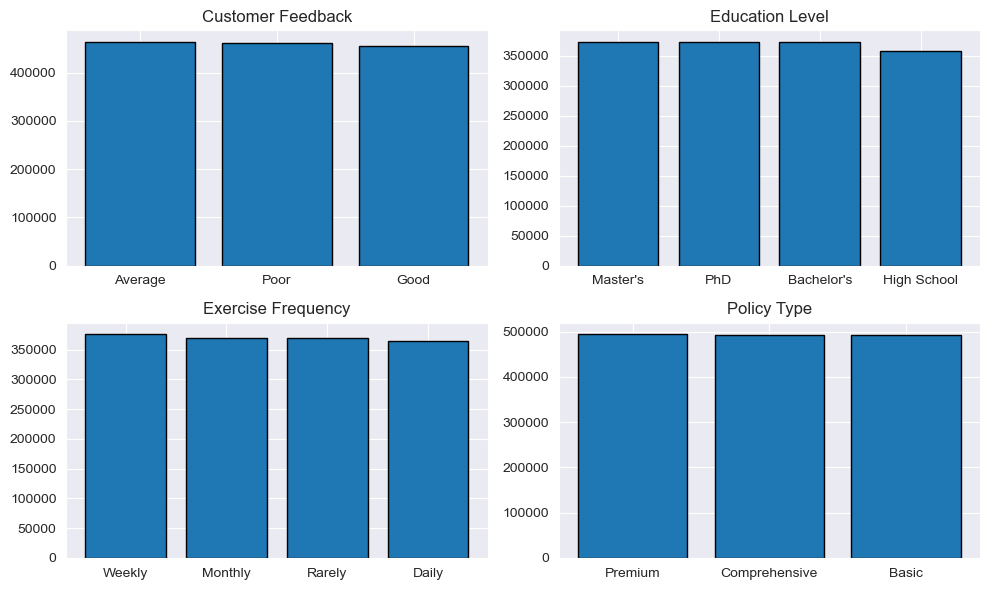

In [71]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

axes[0][0].bar(frame["Customer Feedback"].value_counts().index, frame["Customer Feedback"].value_counts().values, edgecolor='black')
axes[0][0].set_title('Customer Feedback')

axes[0][1].bar(frame["Education Level"].value_counts().index, frame["Education Level"].value_counts().values, edgecolor='black')
axes[0][1].set_title('Education Level')


axes[1][0].bar(frame["Exercise Frequency"].value_counts().index, frame["Exercise Frequency"].value_counts().values, edgecolor='black')
axes[1][0].set_title('Exercise Frequency')

axes[1][1].bar(frame["Policy Type"].value_counts().index, frame["Policy Type"].value_counts().values, edgecolor='black')
axes[1][1].set_title('Policy Type')


plt.tight_layout()

plt.show()


시각화된 데이터의 형태, 값의 빈도수에서 병합되기 전과 비교했을 때 유의미한 차이는 없다고 판단했다.

범주형 명목형, 범주형 순서형 모두 빈도수에 유의미한 차이가 없어서 이상치는 없다고 판단했다.

결측치

결측치 탐지

In [72]:
frame.isnull().sum()

Age                      23390
Annual Income            58904
Credit Score            165768
Customer Feedback        96173
Education Level              0
Exercise Frequency           0
Gender                       0
Health Score             84673
Insurance Duration           1
Location                     0
Marital Status           23548
Number of Dependents    137558
Occupation              439363
Policy Start Date            0
Policy Type                  0
Premium Amount            1841
Previous Claims         445317
Property Type                0
Smoking Status               0
Vehicle Age                  6
dtype: int64

전체 데이터에서 결측치 비율

In [73]:
for column in frame.columns:
    if frame[column].isnull().sum() > 0:
        print(column, round(frame[column].isnull().sum() / len(frame), 3))


Age 0.016
Annual Income 0.04
Credit Score 0.112
Customer Feedback 0.065
Health Score 0.057
Insurance Duration 0.0
Marital Status 0.016
Number of Dependents 0.093
Occupation 0.297
Premium Amount 0.001
Previous Claims 0.301
Vehicle Age 0.0


In [74]:
frame.notnull().all(axis=1).sum()

476989

결측치 처리 방법 계획

결측치가 없는 열을 데이터로 사용해서 머신러닝 모델(Linear Regressor) 기반 or 딥러닝 모델 기반을 사용해서 결측치를 대체하는 것이 적합하다고 판단했다. 그 이유는 데이터 수와 결측치 수에 대한 비율은 낮으나 결측치의 절대적인 양이 매우 많다. 그래서 통계값으로 대체하는 방법, 삭제는 적합하지 않다고 판단했다. 그래서 결측치가 매우 적거나(Insurance Duration, Vehicle Age) 결측치가 전혀 없는 열을 데이터로 사용해서 모델 기반을 사용해서 결측치를 대체하는 방법이 가장 적합하다고 판단했다.  하지만 이상치 처리 단계에서는 모든 열에 대해서 이상치 처리를 하는 것이 더 효율적이라 판단해서 이상치 처리 단계에서 모델 기반 결측치 처리에 사용하는 데이터 열만 이상치 처리하는 것이 아닌 모든 열에 대해서 이상치 처리할 예정이다.

대체 값이 데이터 손실 여부 평가를 위해서 통계값 차이, 데이터 분포를 살펴보고 결측치 처리가 미치는 영향을 평가 예정

모델 기반 결측치 처리를 위한 데이터 수집

In [75]:
frame_null = frame[['Education Level', 'Exercise Frequency', 'Gender', 'Insurance Duration', 'Location', 'Policy Start Date', 'Policy Type', 'Property Type', 'Smoking Status', 'Vehicle Age']]

frame_null.head()

,Education Level,Exercise Frequency,Gender,Insurance Duration,Location,Policy Start Date,Policy Type,Property Type,Smoking Status,Vehicle Age
0,Bachelor's,Weekly,Female,5.00,Urban,2023-12-23 15:21:39.134960,Premium,House,No,17.00
1,Master's,Monthly,Female,2.00,Rural,2023-06-12 15:21:39.111551,Comprehensive,House,Yes,12.00
2,High School,Weekly,Male,3.00,Suburban,2023-09-30 15:21:39.221386,Premium,House,Yes,14.00
3,Bachelor's,Daily,Male,1.00,Rural,2024-06-12 15:21:39.226954,Basic,Apartment,Yes,0.00
4,Bachelor's,Weekly,Male,4.00,Rural,2021-12-01 15:21:39.252145,Premium,House,Yes,8.00


이상치 처리

이상치 탐지 방법 선정 - IQR 기반 이상치 탐지

수치형 데이터들의 그래프를 확인했을 때 다봉에 해당하지 않았다. 하지만 Annual Income의 왜도가 왼쪽으로 심하게 치우쳐 있다. Annual Income은 연봉을 의미하는 열이므로 연봉은 상위 n%와 하위 n%의 차이가 매우 심하기 때문에 정규화 단계에서 문제가 발생할 것이다. 그리고 연봉 데이터들은 왜도가 양의 왜도를 띄는 경향이 있다. 그래서 상위 10% 이상을 이상치로 정의하고 연봉의 상한선을 정하고 상한선의 값으로 이상치를 단순 대체하는 방법을 적용하는 것이 적합하다고 판단했다.


In [85]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
column_stat = (('Age', 'Annual Income', 'Credit Score'), ('Health Score', 'Premium Amount'))

for i in range(len(column_stat)):
    for j in range(len(column_stat[i])):
        col = column_stat[i][j]
        axes[i][j].boxplot(frame[col])
        axes[i][j].set_title(col)
        axes[i][j].set_ylim(frame[col].min(), frame[col].max())

axes[1][2].set_visible(False)

plt.tight_layout()
plt.show()

ValueError: Data has no positive values, and therefore cannot be log-scaled.

Error in callback <function _draw_all_if_interactive at 0x0000021946BD6840> (for post_execute), with arguments args (),kwargs {}:


ValueError: Data has no positive values, and therefore cannot be log-scaled.

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1000x600 with 6 Axes>

이상치 처리

진행해야되는 것들

데이터 분포가 정규 분포를 따르는지 판별 - 데이터 시각화 부분 마크다운에 추가

이상치 탐지 방법 선정 - 결측치 처리를 위해 모델을 구현하는 과정에서 처리

이상치가 중요한 의미를 가지는지 평가 - 위와 동일

hist 그래프에 seaborn을 사용해서 kde 추가 - 결측치 처리 후 진행

데이터 분석을 위해 결측치가 제거된 데이터 프레임 생성